## <h1> HOMEWORK 2 </h1>

<h2> Özge Öneyman 24906 </h2>


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/test_scores.csv')

Mounted at /content/drive


The categorical variables are:

- school
- school_setting
-school_type
- teaching_method
- lunch




In [2]:
data = data.dropna()

In [3]:
labels = data['posttest']

data_n = data.drop(columns=['posttest'])

In [4]:
data_n = data_n.drop(columns=['classroom', 'student_id', 'lunch'])

In [5]:
categorical_variables = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender']
data_cat = data_n[categorical_variables]
data_cat.head()

,school,school_setting,school_type,teaching_method,gender
0,ANKYI,Urban,Non-public,Standard,Female
1,ANKYI,Urban,Non-public,Standard,Female
2,ANKYI,Urban,Non-public,Standard,Male
3,ANKYI,Urban,Non-public,Standard,Female
4,ANKYI,Urban,Non-public,Standard,Male


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(data_n[['school', 'school_setting', 'school_type', 'teaching_method', 'gender']]).toarray())

print(encoder_df)

       0    1    2    3    4    5    6    7    8    9   ...   22   23   24  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2129  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2131  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
2132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   

       25   26   27   28   29   30   31  
0     1.0  1.0  0.0  

In [7]:
data_n = data_n.drop(columns=categorical_variables)
data_n = pd.concat((data_n, encoder_df), axis = 1)

In [8]:
data_num = data_n[['n_student','pretest']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features_np = sc.fit_transform(data_num)
scaled_features = pd.DataFrame(scaled_features_np, columns=['n_student','pretest'])
scaled_features.head()

,n_student,pretest
0,-0.661447,0.519477
1,-0.661447,0.814464
2,-0.661447,0.666971
3,-0.661447,0.445730
4,-0.661447,0.666971


In [9]:
data_num_scaled = pd.concat((scaled_features, encoder_df), axis = 1)
data_num_scaled.tail()

,n_student,pretest,0,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
2128,1.703793,-1.176698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2129,1.703793,-1.250445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2130,1.703793,-0.734217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2131,1.703793,-0.660471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2132,1.703793,-1.029204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [10]:
from sklearn.model_selection import train_test_split

x, y = data_num_scaled, labels

print("Shape of the set: ", data_n.shape)

# Split as 70%-15%-15%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=12)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1765,random_state=12)

print("Shape of train set: ", x_train.shape)
print("Shape of val set: ", x_val.shape)
print("Shape of test set: ", x_test.shape)

Shape of the set:  (2133, 34)
Shape of train set:  (1493, 34)
Shape of val set:  (320, 34)
Shape of test set:  (320, 34)


# Linear Regression 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)


y_pred1 = lin_reg.predict(x_train)

print('Coefficients: \n', lin_reg.coef_)
print('Bias:', lin_reg.intercept_)

print("Train Mean absolute error: %.2f"
      % mean_absolute_error(y_train, y_pred1))
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred1))
y_pred1 = lin_reg.predict(x_val)

lr_mse = mean_squared_error(y_val, y_pred1)

print("Valid Mean absolute error: %.2f"
      % mean_absolute_error(y_val, y_pred1))
print("Valid Mean squared error: %.2f"
      % lr_mse)

Coefficients: 
 [-4.62193245e-02  1.13820507e+01  5.21610612e+10  4.16138639e+11
  5.21610612e+10 -2.12527182e+11  1.51450396e+11  3.06903009e+11
  1.51450396e+11  4.22147665e+10 -2.12527182e+11  5.21610612e+10
  5.21610612e+10  4.22147665e+10  4.22147665e+10  4.22147665e+10
 -2.12527182e+11  1.51450396e+11  1.51450396e+11  4.16138639e+11
  3.06903009e+11  4.22147665e+10 -2.12527182e+11  1.51450396e+11
 -2.12527182e+11  1.12944524e+11  3.70889457e+09  3.67686472e+11
 -2.06230014e+11  5.84582289e+10 -9.19087973e+10 -9.19087973e+10
 -2.51742612e+09 -2.51742612e+09]
Bias: -119191295718.1775
Train Mean absolute error: 2.42
Train Mean squared error: 9.37
Valid Mean absolute error: 2.63
Valid Mean squared error: 10.60


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


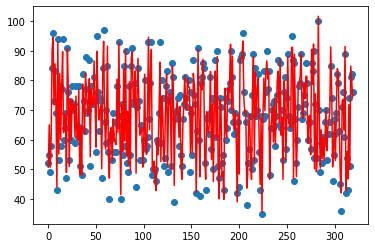

In [12]:
xaxis = np.arange(y_val.shape[0])
plt.scatter(xaxis,y_val)
plt.plot(xaxis,y_pred1, 'r')

# 2 degree Polynomial 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

y_pred2 = lin_reg_2.predict(X_poly_train)

print('Coefficients: \n', lin_reg_2.coef_)
print('Bias:', lin_reg_2.intercept_)

print("Train Mean absolute error: %.2f"
      % mean_absolute_error(y_train, y_pred2))
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred2))

X_poly_valid = poly_reg.transform(x_val)

y_pred2 = lin_reg_2.predict(X_poly_valid)

lr2_mse = mean_squared_error(y_val, y_pred2)

print("Valid Mean absolute error: %.2f"
      % mean_absolute_error(y_val, y_pred2))
print("Valid Mean squared error: %.2f"
      % lr2_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Coefficients: 
 [-2.82392235e+09 -5.47074338e+13  3.28706703e+13 -2.84934663e+13
  1.54719961e+13  3.40005806e+13 -1.33791800e+13  4.63926180e+13
 -1.57106224e+13  5.69944948e+13 -1.79956885e+13 -4.15443465e+13
 -3.38787419e+13 -5.29653870e+12  3.53625869e+13  1.40060058e+13
  2.81593595e+13 -3.06316581e+13 -2.03573722e+13 -1.89065211e+12
  2.01005245e+13  1.29286339e+12  2.00524612e+13  1.08411995e+13
  2.65861226e+13 -3.44639024e+13 -6.75291982e+12  4.45188651e+13
 -4.36301470e+13 -3.77516256e+13  3.70691760e+13  5.97290726e+12
  1.17419422e+12 -1.47860690e+11  1.18820655e+13  2.55468750e+00
 -9.60937500e-01 -2.25498592e+12  1.80279621e+13 -2.25498592e+12
 -1.09798244e+13  9.30312365e+12  3.28410718e+12  9.30312365e+12
 -5.44073129e+12 -1.09798244e+13 -2.25498592e+12  7.85441267e+12
 -5.44073129e+12 -5.44073129e+12 -5.44073129e+12 -1.09798244e+13
  9.30312365e+12  9.30312365e+12  1.80279621e+13  3.28410718e+12
 -5.44073129e+12 -1.09798244e+13  9.30312365e+12 -1.09798244e+13
  1.80089

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


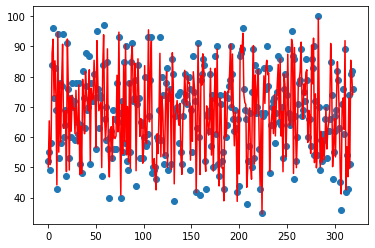

In [14]:
xaxis = np.arange(y_val.shape[0])
plt.scatter(xaxis,y_val)
plt.plot(xaxis,y_pred2, 'r')

# 3 degree Polynomial 

In [15]:
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_train = poly_reg_3.fit_transform(x_train)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_train, y_train)

y_pred3 = lin_reg_3.predict(X_poly_train)

print('Coefficients: \n', lin_reg_3.coef_)
print('Bias:', lin_reg_3.intercept_)

print("Train Mean absolute error: %.2f"
      % mean_absolute_error(y_train, y_pred3))
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred3))

X_poly_valid = poly_reg_3.transform(x_val)
X_poly_valid.shape
y_pred3 = lin_reg_3.predict(X_poly_valid)

lr3_mse = mean_squared_error(y_val, y_pred3)

print("Valid Mean absolute error: %.2f"
      % mean_absolute_error(y_val, y_pred3))
print("Valid Mean squared error: %.2f"
      % lr3_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Coefficients: 
 [-1.79415034e+09 -3.88909066e+09 -2.18305280e+09 ...  0.00000000e+00
  0.00000000e+00 -4.90555952e+08]
Bias: 3923851199.3498554
Train Mean absolute error: 2.03
Train Mean squared error: 6.73
Valid Mean absolute error: 2.62
Valid Mean squared error: 10.74


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


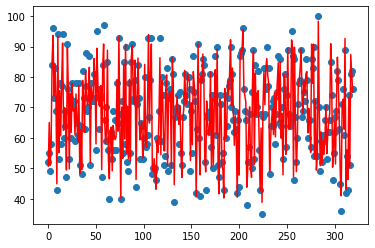

In [16]:
xaxis = np.arange(y_val.shape[0])
plt.scatter(xaxis,y_val)
plt.plot(xaxis,y_pred3, 'r')




# 4 degree Polynomial 

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

poly_reg_4 = PolynomialFeatures(degree=4)
X_poly_train = poly_reg_4.fit_transform(x_train)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_train, y_train)

y_pred4 = lin_reg_4.predict(X_poly_train)

print('Coefficients: \n', lin_reg_4.coef_)
print('Bias:', lin_reg_4.intercept_)

print("Train Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred4))
print("Train Mean squared error: %.2f" % mean_squared_error(y_train, y_pred4))

X_poly_valid = poly_reg_4.transform(x_val)
y_pred4 = lin_reg_4.predict(X_poly_valid)

lr4_mse = mean_squared_error(y_val, y_pred4)

print("Valid Mean absolute error: %.2f"
      % mean_absolute_error(y_val, y_pred4))
print("Valid Mean squared error: %.2f"
      % lr4_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Coefficients: 
 [-1.29886510e+11 -1.28017317e+13 -5.76968455e+12 ...  0.00000000e+00
  0.00000000e+00 -3.52328320e+10]
Bias: -6181096018109.383
Train Mean absolute error: 1.93
Train Mean squared error: 6.06
Valid Mean absolute error: 3.11
Valid Mean squared error: 16.82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


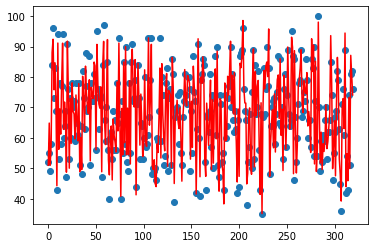

In [18]:
xaxis = np.arange(y_val.shape[0])
plt.scatter(xaxis,y_val)
plt.plot(xaxis,y_pred4, 'r')

## Model Selection
 

In the below all in one graph.

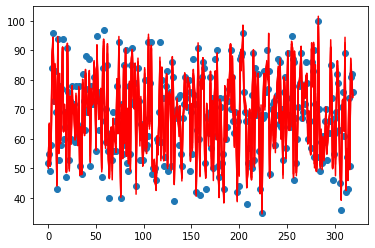

In [19]:
xaxis = np.arange(y_val.shape[0])
plt.scatter(xaxis,y_val)
plt.plot(xaxis,y_pred1, 'r')
plt.plot(xaxis,y_pred2, 'r')
plt.plot(xaxis,y_pred3, 'r')
plt.plot(xaxis,y_pred4, 'r')

In [20]:
print('Linear regression mse:\t\t', lr_mse,
      '\n2 degree polynomial mse:\t', lr2_mse,
      '\n3 degree polynomial mse:\t', lr3_mse,
      '\n4 degree polynomial mse:\t', lr4_mse)

Linear regression mse:		 10.60144373712319 
2 degree polynomial mse:	 9.849518501758576 
3 degree polynomial mse:	 10.737499656783797 
4 degree polynomial mse:	 16.823725977540015


In [21]:
nums= [lr_mse, lr2_mse, lr3_mse, lr4_mse]
nums.sort()
print('List in Ascending Order: ', nums)

List in Ascending Order:  [9.849518501758576, 10.60144373712319, 10.737499656783797, 16.823725977540015]


When we look at the above results we see that MSE, which is  mean of the squared difference between our estimataion and our data, is smaller in 2 degree polynomial model, which indicates better estimation. Thus, optimal value of p is 2.

From the below, you could see the test results according to optimal value p=2

Test Mean absolute error: 2.66
Test Mean squared error: 10.80


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


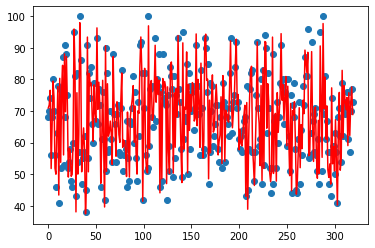

In [22]:
X_poly_test = poly_reg.transform(x_test)
X_poly_test.shape

y_pred = lin_reg_2.predict(X_poly_test)

print("Test Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))
print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
xaxis = np.arange(y_test.shape[0])
plt.scatter(xaxis,y_test)
plt.plot(xaxis,y_pred, 'r')

#KNN MODEL 

In [23]:
from sklearn.neighbors import KNeighborsClassifier


kVals = [2, 5, 10, 15]


accuracies = []
preds = []
for k in kVals:

  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  
  score = model.score(x_val, y_val)
  print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  y_pred = model.predict(x_train)
  print("Train Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred))
  print("Train Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
  y_pred = model.predict(x_val)

  val_mean = mean_squared_error(y_val, y_pred)

  print("Valid Mean absolute error: %.2f"
        % mean_absolute_error(y_val, y_pred))
  print("Valid Mean squared error: %.2f"
        % val_mean)
  
  accuracies.append(val_mean)
  preds.append(y_pred)
print("The MSEs : " , accuracies)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

For k = 2, validation accuracy = 9.06250%
Train Mean absolute error: 1.72
Train Mean squared error: 9.11
Valid Mean absolute error: 3.29
Valid Mean squared error: 16.61
For k = 5, validation accuracy = 7.18750%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Train Mean absolute error: 2.65
Train Mean squared error: 15.95
Valid Mean absolute error: 3.64
Valid Mean squared error: 20.67
For k = 10, validation accuracy = 8.43750%
Train Mean absolute error: 2.82
Train Mean squared error: 16.18
Valid Mean absolute error: 3.40
Valid Mean squared error: 19.26
For k = 15, validation accuracy = 6.56250%
Train Mean absolute error: 3.03
Train Mean squared error: 18.46


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Valid Mean absolute error: 3.82
Valid Mean squared error: 23.86
The MSEs :  [16.609375, 20.671875, 19.2625, 23.859375]


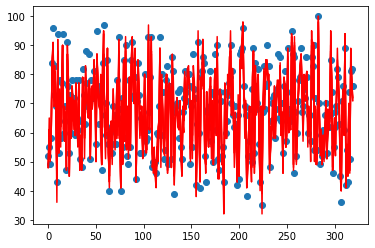

In [24]:
xaxis = np.arange(y_val.shape[0])
plt.scatter(xaxis,y_val)
plt.plot(xaxis,preds[0], 'r')
plt.plot(xaxis,preds[1], 'r')
plt.plot(xaxis,preds[2], 'r')
plt.plot(xaxis,preds[3], 'r')

When we look at the above results we see that MSE, which is  mean of the squared difference between our estimataion and our data, is smaller when n=2, which indicates better estimation. Thus, optimal value of n is 2.

From the below, you could see the test results according to optimal value of n, which is 2.


In [25]:
# Train kNN with the best k value using all the training data 
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

from sklearn.metrics import accuracy_score
TestAccuracy = accuracy_score(y_test, predictions)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))

print("Test Mean absolute error: %.2f"
      % mean_absolute_error(y_test, predictions))
print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Testing Accuracy = 9.37500%
Test Mean absolute error: 3.18
Test Mean squared error: 16.38


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Report

Our problem in this homework is predicting the test scores (posttest) of the students according to some features of the students, like school, school type, teaching method etc., with some Machine Learning algoritms. 
Before starting the predictions, first I drop the missing values if there is any. Then I devide our label from the data set and drop the unnecesary features which I think is not relevant to test scores. After that, I define my categorical variables which are relevant to our label, and encode them with one-hot encoding. Then I standardize some data values into a standard format, and concat them with the the data which I encoded. Then, I split that data as 70%-15%-15%. Then I trained the data with Polynomial regression and KNN model. While, I trained the polynomial degress it takes a bit more when p equals to 3 and 4. When I compare the MSE results of different polynomial degrees, which is mean of the squared difference between our estimataion and our data, is smaller in 2 polynomial degree model, which indicates better estimation. Thus, optimal value of p is 2. 
We obtain the below results on the test data, when p is 2. 


- Train Mean absolute error: 2.24
- Train Mean squared error: 8.11
- Valid Mean absolute error: 2.54
- Valid Mean squared error: 9.85
- Test Mean absolute error: 2.60
- Test Mean squared error: 10.41

When we look at the KNN model's MSE results is smaller when n=2, which indicates better estimation. Thus, our optimal value of n is 2.
We have obtained the best results when n=2, with giving classification test accuracy of 9.37% on test data.


- Train Mean absolute error: 1.72
- Train Mean squared error: 9.11
- Valid Mean absolute error: 3.29
- Valid Mean squared error: 16.61
- Test Mean absolute error: 3.18
- Test Mean squared error: 16.38